In [ ]:
# For the given ‘Wine’ dataset, perform the following
# tasks:

In [ ]:
# Q.1 Compute and plot those feature which are related to each
# other?

In [ ]:
# Q.2 What are the optimum number of principal components
# in PCA?

In [ ]:
# Q.3 Build a KNN classifier considering optimal number of
# principal components and value of K and state its score.

In [ ]:
# Q.4 Build a SVM Classifier and tune the hyperparameters to
# get the optimum model.

In [ ]:
# Q.5 Build a Naive Bayes Classifier and comment about its
# accuracy.

In [ ]:
# Q.6 Compare all of the models and justify your choice about
# the optimum model.

In [1]:
import zipfile
import pandas as ps
import numpy as pn
import seaborn as sns
import matplotlib .pyplot as mt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
with zipfile.ZipFile(r"C:\Users\Harshit\Downloads\164941827435660ec2379f8793842aa5b168a_.zip") as x:
    with x.open(r"6 KNN + SVM + Naive Bayes + PCA/Wine.csv") as v:
        fd = ps.read_csv(v)
fd.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1


In [3]:
fd.shape

(178, 14)

In [4]:
fd.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [5]:
# Q.1 Compute and plot those feature which are related to each
# other?

In [6]:
# Compute the correlation matrix
correlation_matrix = fd.corr()

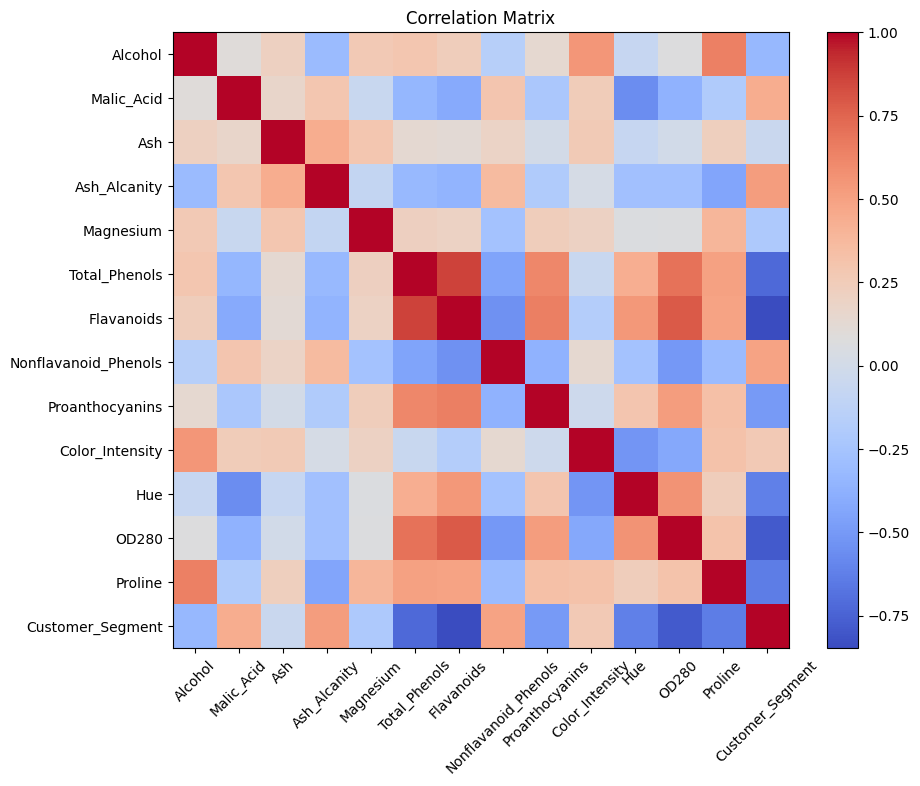

In [7]:
# Plot the correlation matrix as a heatmap
mt.figure(figsize=(10, 8))
mt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
mt.colorbar()
mt.xticks(range(len(fd.columns)), fd.columns, rotation=45)
mt.yticks(range(len(fd.columns)), fd.columns)
mt.title('Correlation Matrix')
mt.show()

In [8]:
# Q.2 What are the optimum number of principal components
# in PCA?

In [9]:
# Separate features (X) and labels (y)
X = fd.drop('Customer_Segment', axis=1)
y = fd['Customer_Segment']

In [10]:
# Standardize the features (important for PCA)
X_std = (X - X.mean()) / X.std()

In [11]:
# Perform PCA and get explained variance ratio
pca = PCA()
pca.fit(X_std)
explained_variance_ratio = pca.explained_variance_ratio_

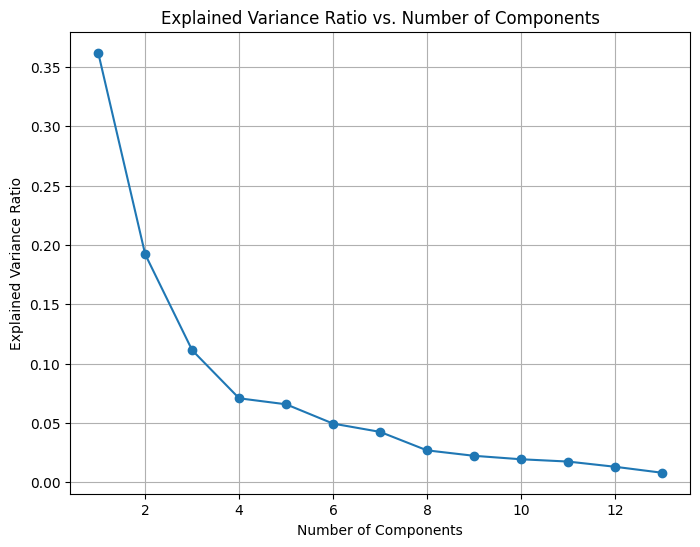

In [12]:
# Plot the explained variance ratio as a function of the number of components
mt.figure(figsize=(8, 6))
mt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
mt.xlabel('Number of Components')
mt.ylabel('Explained Variance Ratio')
mt.title('Explained Variance Ratio vs. Number of Components')
mt.grid()
mt.show()

In [13]:
# Q.3 Build a KNN classifier considering optimal number of
# principal components and value of K and state its score.

In [15]:
# Separate features (X) and labels (y)
X = fd.drop('Customer_Segment', axis=1)
y = fd['Customer_Segment']

In [16]:
# Standardize the features (important for PCA and KNN)
X_std = (X - X.mean()) / X.std()

In [14]:
# Perform PCA to reduce the dimensionality to the optimal number of components
n_components = 4  # Replace this with the determined optimal number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_std)

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [16]:
# Train the KNN classifier with the chosen value of K
k_value = 5  # Replace this with the determined optimal value of K
knn_classifier = KNeighborsClassifier(n_neighbors=k_value)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
# Evaluate the classifier on the test data and compute its score
y_pred = knn_classifier.predict(X_test)
accuracy_KNN = accuracy_score(y_test, y_pred)

In [18]:
print("KNN Classifier Score:", accuracy_KNN)

KNN Classifier Score: 0.9444444444444444


In [19]:
# Q.4 Build a SVM Classifier and tune the hyperparameters to
# get the optimum model.

In [23]:
# Separate features (X) and labels (y)
X = fd.drop('Customer_Segment', axis=1)
y = fd['Customer_Segment']

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Define the SVM classifier
svm_classifier = SVC()

In [21]:
# Define the hyperparameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf'
}

In [22]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [23]:
# Get the best hyperparameters from grid search
best_params = grid_search.best_params_

In [24]:
# Create a new SVM classifier with the best hyperparameters
best_svm_classifier = SVC(**best_params)

In [25]:
# Train the best SVM classifier on the training data
best_svm_classifier.fit(X_train, y_train)

SVC(C=1)

In [26]:
# Evaluate the best SVM classifier on the test data
y_pred = best_svm_classifier.predict(X_test)
accuracy_SVM = accuracy_score(y_test, y_pred)

In [27]:
print("Best SVM Classifier Hyperparameters:", best_params)
print("Best SVM Classifier Score:", accuracy_SVM)

Best SVM Classifier Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best SVM Classifier Score: 1.0


In [28]:
# Q.5 Build a Naive Bayes Classifier and comment about its
# accuracy.

In [29]:
# Separate features (X) and labels (y)
X = fd.drop('Customer_Segment', axis=1)
y = fd['Customer_Segment']

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Create the Naive Bayes classifier (Gaussian Naive Bayes)
naive_bayes_classifier = GaussianNB()

In [31]:
# Train the classifier on the training data
naive_bayes_classifier.fit(X_train, y_train)

GaussianNB()

In [32]:
# Make predictions on the test data
y_pred = naive_bayes_classifier.predict(X_test)

In [33]:
# Make predictions on the test data
y_pred = naive_bayes_classifier.predict(X_test)

In [34]:
# Get a detailed classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)



Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



In [35]:
accuracy_NB = accuracy_score(y_test, y_pred)
print("Best NB Classifier Score:", accuracy_NB)

Best NB Classifier Score: 0.9722222222222222


In [36]:
model_comparison = ps.DataFrame({
    "Model": ["KNN", "SVM", "Naive Byes"],
    "Accuracy": [accuracy_KNN, accuracy_SVM, accuracy_NB],
})

print(model_comparison)

        Model  Accuracy
0         KNN  0.944444
1         SVM  1.000000
2  Naive Byes  0.972222


In [ ]:
# As we can clealy see that SVM is giving 100% accuracy but there should be a chance that it is
# overfitting rather than that Naive Byes is performing really good.